In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from xgboost import XGBRegressor
import shap

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wildblueberrydatasetpollinationsimulation/WildBlueberryPollinationSimulationData.csv


In [2]:
df = pd.read_csv("/kaggle/input/wildblueberrydatasetpollinationsimulation/WildBlueberryPollinationSimulationData.csv", index_col='Row#')
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

In [4]:
df.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [5]:
features_df = df.drop('yield', axis=1)
tar = df['yield']

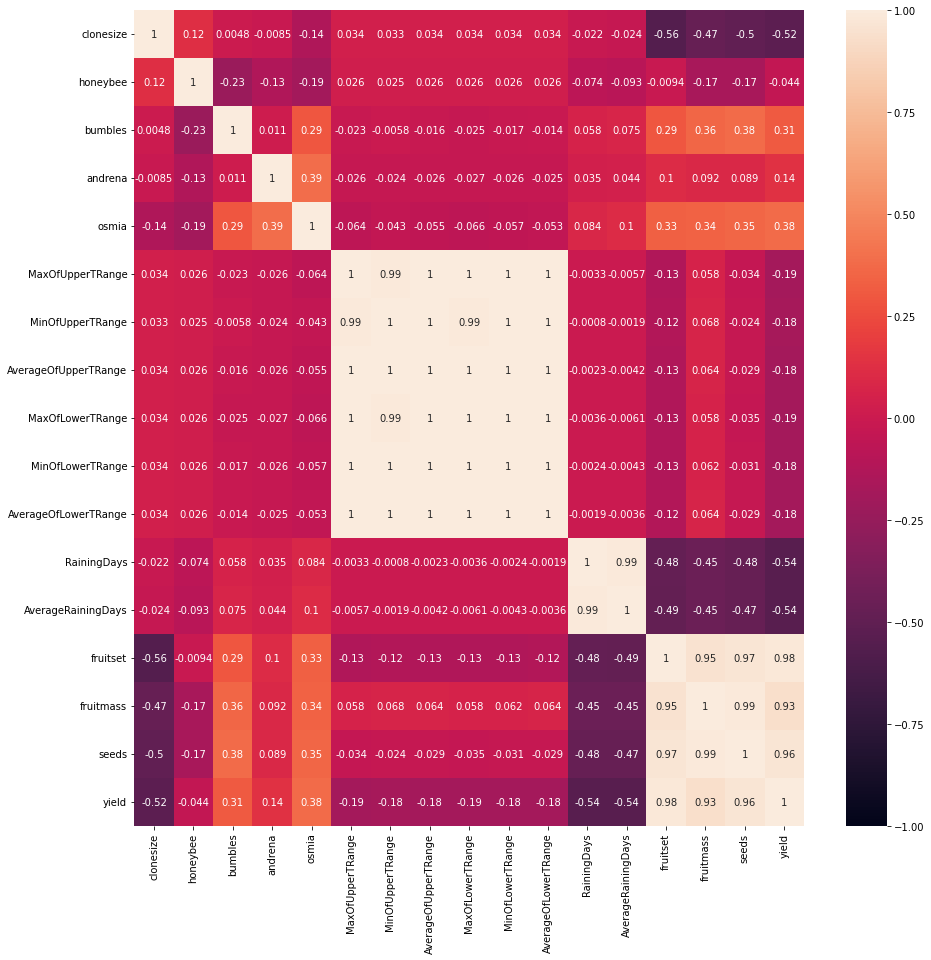

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

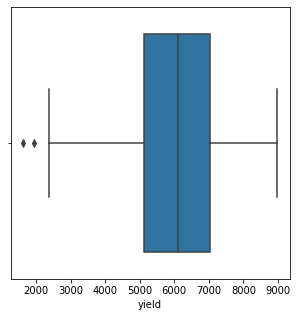

In [7]:
plt.figure(figsize=(5,5))
sns.boxplot(x='yield', data=df)
plt.show()

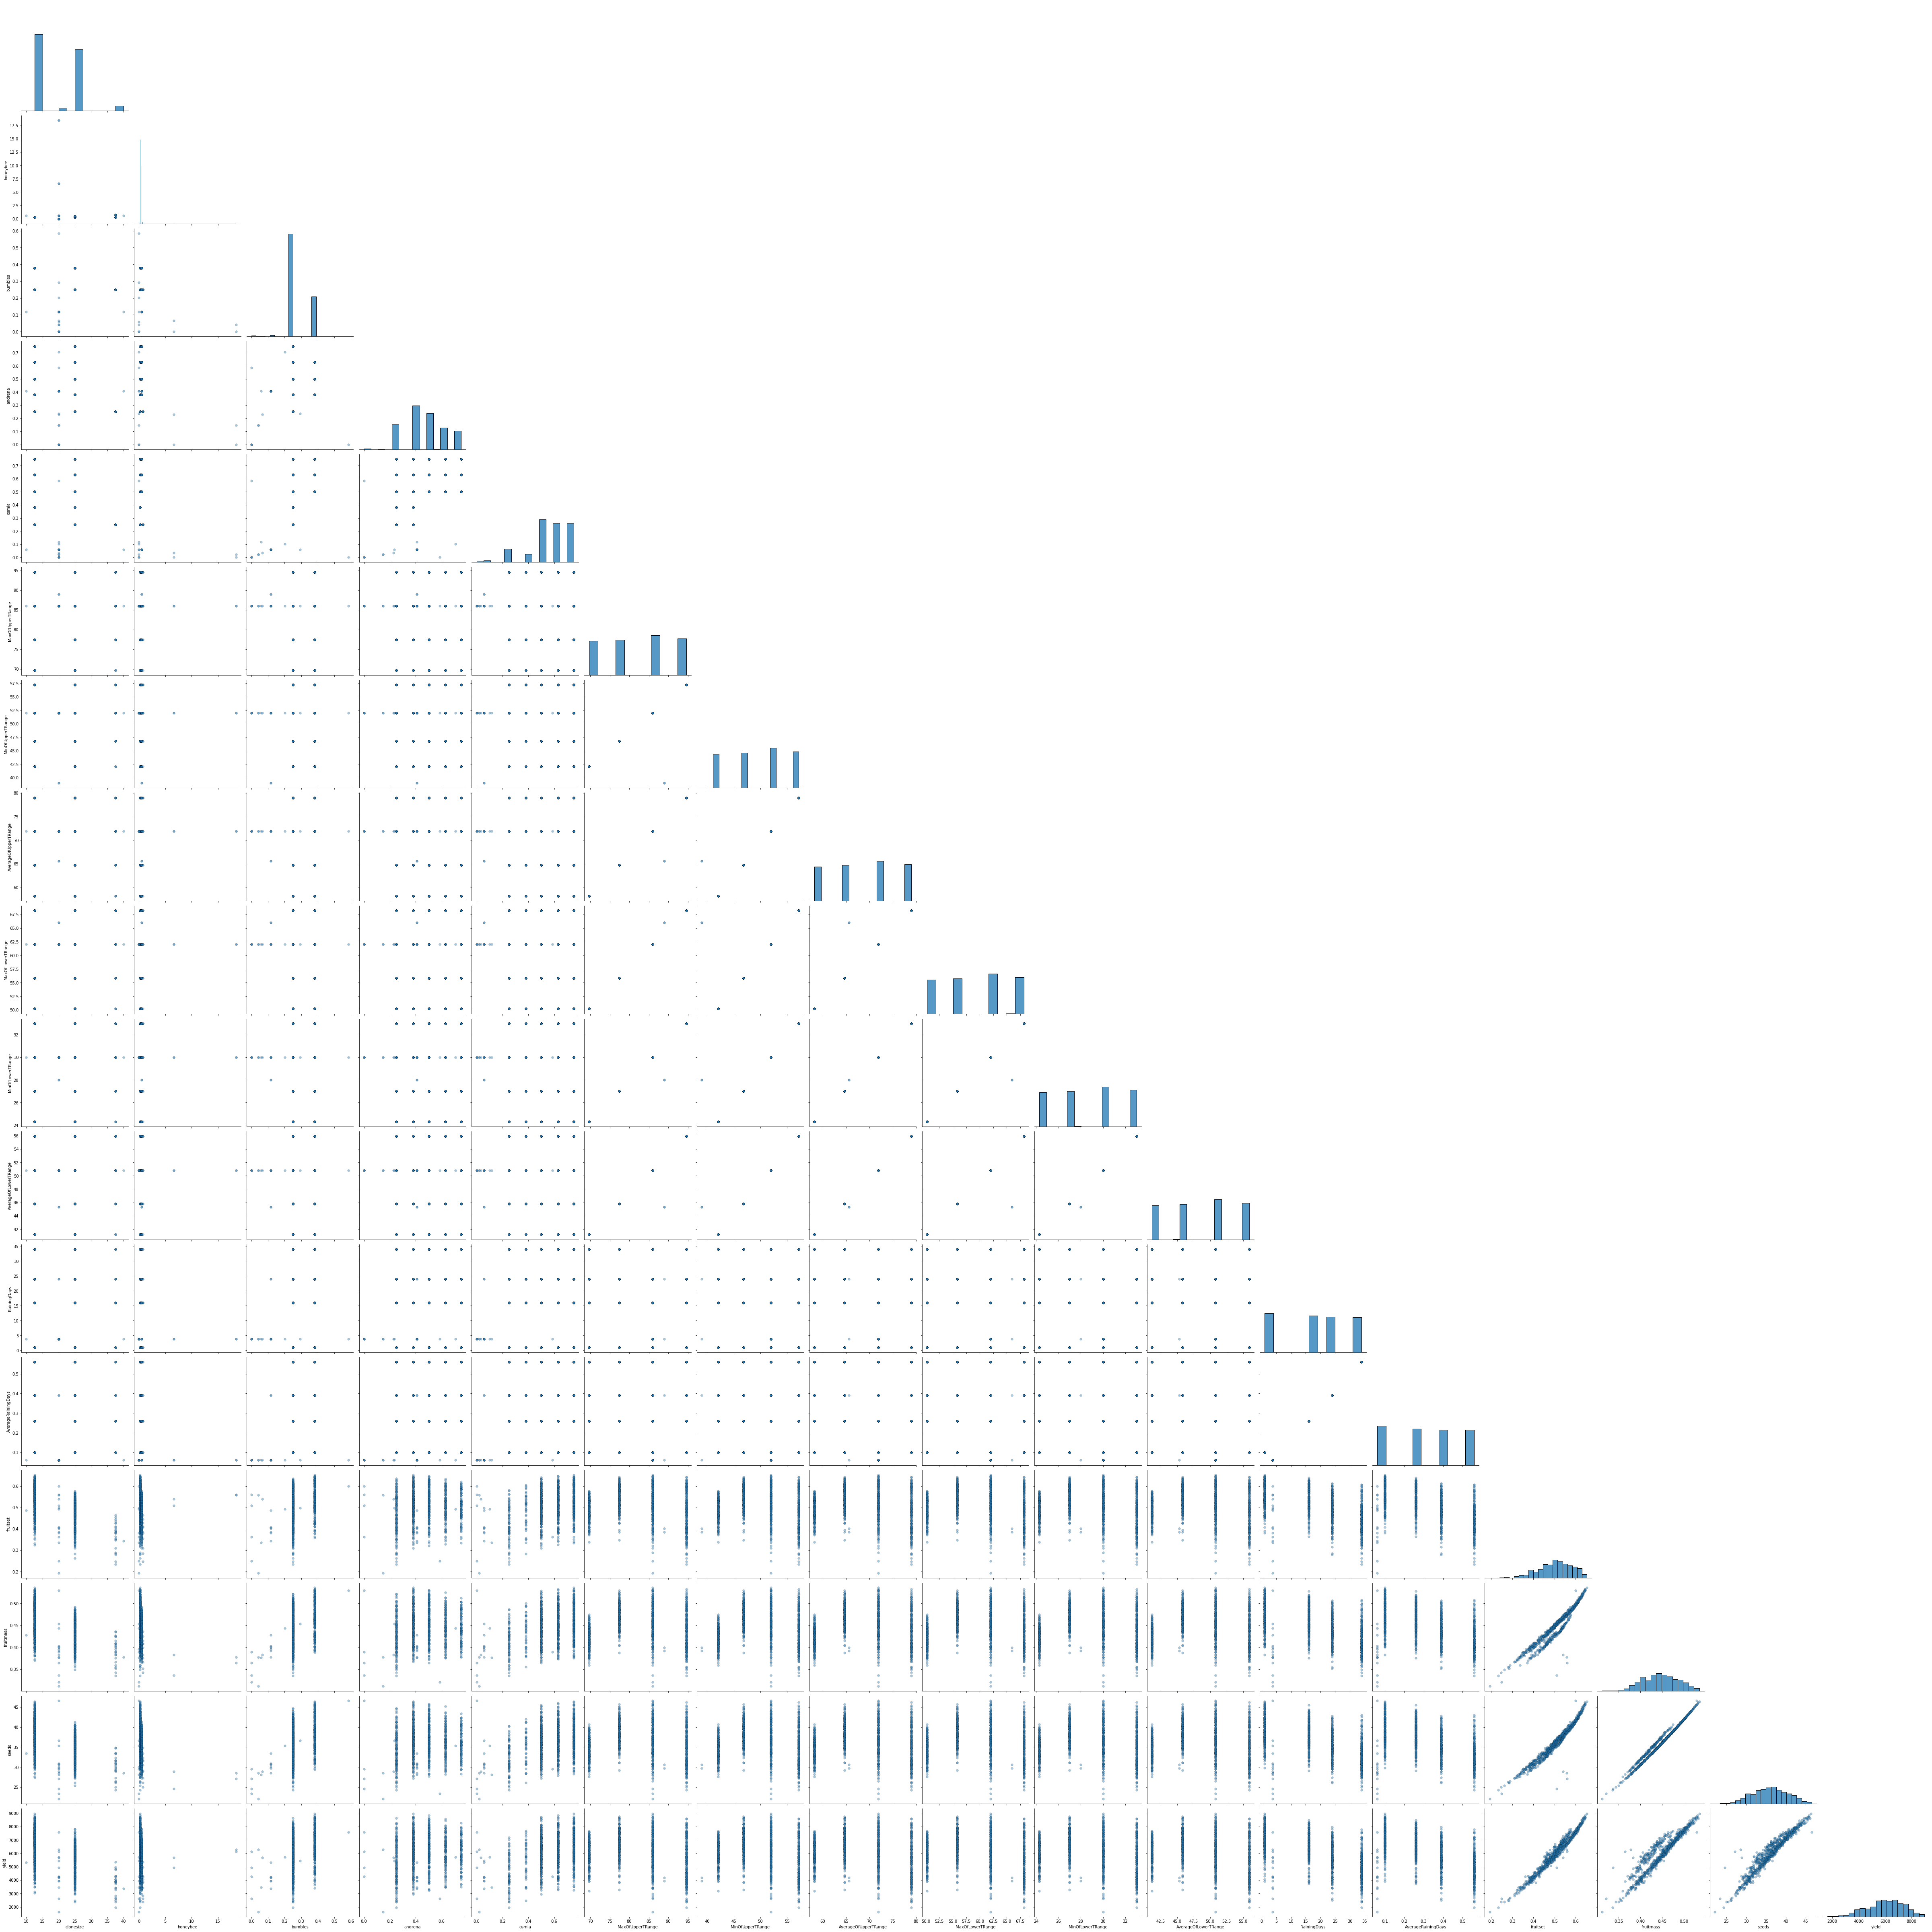

In [8]:
sns.pairplot(df, 
            height=4,
            plot_kws = {'alpha': 0.4, 's': 30, 'edgecolor': 'k'},
            corner=True
           );

In [9]:
df.nunique()

clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

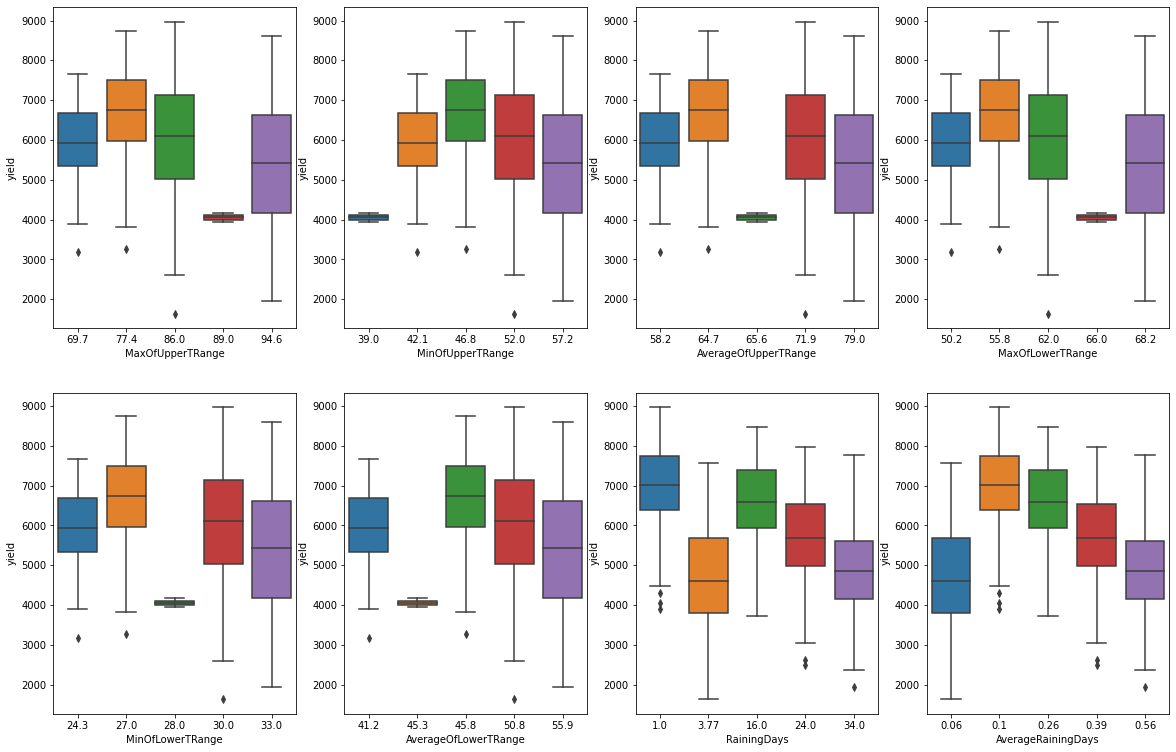

In [10]:
nominal_df = df[['MaxOfUpperTRange','MinOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange',
               'MinOfLowerTRange','AverageOfLowerTRange','RainingDays','AverageRainingDays']]

fig, ax = plt.subplots(2,4, figsize=(20,13))
for e, col in enumerate(nominal_df.columns):
    if e<=3:
        sns.boxplot(data=df, x=col, y='yield', ax=ax[0,e])
    else:
        sns.boxplot(data=df, x=col, y='yield', ax=ax[1,e-4])       
plt.show()

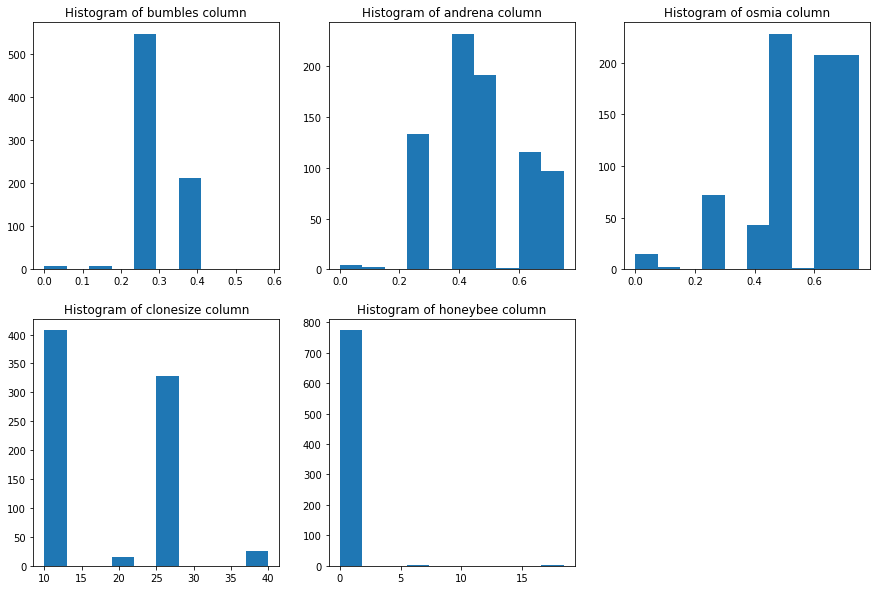

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df['bumbles'])
plt.title("Histogram of bumbles column")
plt.subplot(2,3,2)
plt.hist(df['andrena'])
plt.title("Histogram of andrena column")
plt.subplot(2,3,3)
plt.hist(df['osmia'])
plt.title("Histogram of osmia column")
plt.subplot(2,3,4)
plt.hist(df['clonesize'])
plt.title("Histogram of clonesize column")
plt.subplot(2,3,5)
plt.hist(df['honeybee'])
plt.title("Histogram of honeybee column")
plt.show()

## Observations:

- Upper and lower T range columns correlate with each other
- Rainy days and average rainy days correlates with each other
- Fruitmass, fruitset and seeds are correlated
- 'bumbles' column is highly imbalance while 'andrena' and 'osmia' columns are not
- 'honeybee' is also imbalanced column compared to 'clonesize'

In [12]:
# run the MI scores of the dataset
mi_score = mutual_info_regression(features_df, tar, n_neighbors=3,random_state=42)
mi_score_df = pd.DataFrame({'columns':features_df.columns, 'MI_score':mi_score})
mi_score_df.sort_values(by='MI_score', ascending=False)

,columns,MI_score
13,fruitset,1.948853
15,seeds,1.664007
14,fruitmass,1.588506
12,AverageRainingDays,0.217232
11,RainingDays,0.215965
0,clonesize,0.182163
5,MaxOfUpperTRange,0.125941
6,MinOfUpperTRange,0.125599
8,MaxOfLowerTRange,0.124477
10,AverageOfLowerTRange,0.123369


- We can see TOP features with high correlation with target variable, we can keep most significant features and remove less significant features for modeling task
- We will keep types of bees columns + clonesize and averageoflower and upper T range features for modeling
- Cluster all 4 types of Bees to reduce features
- standardize the dataset and build baseline using GBT and RandomForest
- We will remove fruitset, fruitmass and seeds columns as they are part of Target only (Domain Knowledge insight)

In [13]:
# clustering using kmeans algorithm
X_clus = features_df[['honeybee','osmia','bumbles','andrena']]

scaler = StandardScaler()
scaler.fit(X_clus)
X_new_clus = scaler.transform(X_clus)

clustering = KMeans(n_clusters=3, random_state=42)
clustering.fit(X_new_clus)
n_cluster = clustering.labels_

In [14]:
# add new feature to feature_Df 
features_df['n_cluster'] = n_cluster
df['n_cluster'] = n_cluster
features_df['n_cluster'].value_counts()

1    368
0    213
2    196
Name: n_cluster, dtype: int64

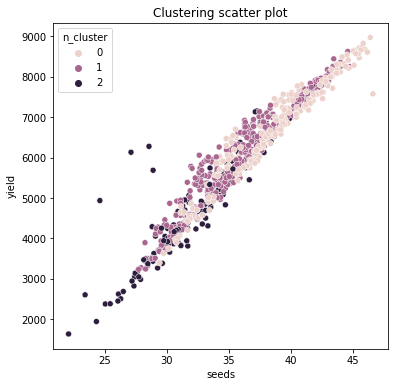

In [15]:
# let's plot most imporatant feature VS yield
plt.figure(figsize=(6,6))
sns.scatterplot(x='seeds', y='yield', hue='n_cluster', data=df)
plt.title("Clustering scatter plot")
plt.show()

- Clustering helps to divide samples into three group and it can be seen 'yield' VS 'seeds' plot
- We will reduce the feature set to select best features from our EDA proceed to build baseline modelling

In [26]:
features_set = ['AverageRainingDays','clonesize','AverageOfLowerTRange',
               'AverageOfUpperTRange','honeybee','osmia','bumbles','andrena','n_cluster']

# final dataframe
X = features_df[features_set]
y = tar.round(1)

In [27]:
# train and test dataset to build baseline model using GBT and RFs by scaling the dataset
mx_scaler = MinMaxScaler()
X_scaled = pd.DataFrame(mx_scaler.fit_transform(X))
X_scaled.columns = X.columns

## Baseline

In [29]:
# let's fit the data to the models
model_dict = {"abr": AdaBoostRegressor(), 
              "gbr": GradientBoostingRegressor(), 
              "rfr": RandomForestRegressor()
             }

for key, val in model_dict.items():
    print(f"cross validation for {key}")
    score = cross_val_score(val, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mean_score = -np.sum(score)/5
    sqrt_score = np.sqrt(mean_score) 
    print(sqrt_score)

cross validation for abr
730.974385377955
cross validation for gbr
528.1673164806733
cross validation for rfr
608.0681265123212


- lowest score is for adaboost regressor

## GBM modeling 1st iteration

In [31]:
# split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

bgt = GradientBoostingRegressor(random_state=42)
bgt.fit(X_train,y_train)
preds = bgt.predict(X_test)
score = bgt.score(X_train,y_train)
rmse_score = np.sqrt(mean_squared_error(y_test, preds))
r2_score = r2_score(y_test, preds)
print("RMSE score gradient boosting machine:", rmse_score)      
print("R2 score for the model: ", r2_score)

RMSE score gradient boosting machine: 363.18286194620714
R2 score for the model:  0.9321362721127562


## Hyper parameter tuning using gridsearchCV

In [32]:
kf = KFold(n_splits = 5, shuffle=True, random_state=0)

param_grid = {'n_estimators': [100,200,400,500,800],
             'learning_rate': [0.1,0.05,0.3,0.7],
             'min_samples_split': [2,4],
             'min_samples_leaf': [0.1,0.4],
             'max_depth': [3,4,7]
             }

estimator = GradientBoostingRegressor(random_state=42)

clf = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kf, 
                   scoring='neg_mean_squared_error', n_jobs=-1)
clf.fit(X_scaled,y)

best_estim = clf.best_estimator_
best_score = clf.best_score_
best_param = clf.best_params_
print("Best Estimator:", best_estim)
print("Best score:", np.sqrt(-best_score))

Best Estimator: GradientBoostingRegressor(max_depth=7, min_samples_leaf=0.1, n_estimators=500,
                          random_state=42)
Best score: 306.57274619213206


## Regression modeling using statsmodels API

In [33]:
# building statsmodel regression model
model = sm.OLS(y, X_scaled)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  yield   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              7888.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):                        0.00
Time:                        14:00:06   Log-Likelihood:                         -6120.2
No. Observations:                 777   AIC:                                  1.226e+04
Df Residuals:                     768   BIC:                                  1.230e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

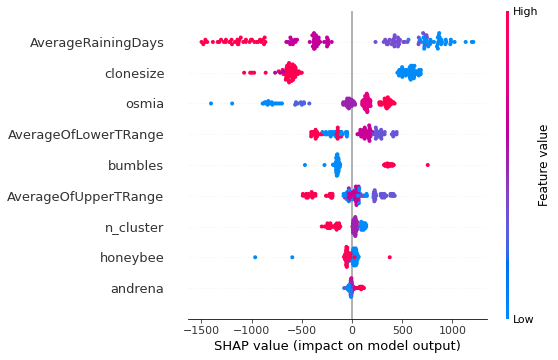

In [34]:
shap_tree = shap.TreeExplainer(bgt)
shap_values = shap_tree.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

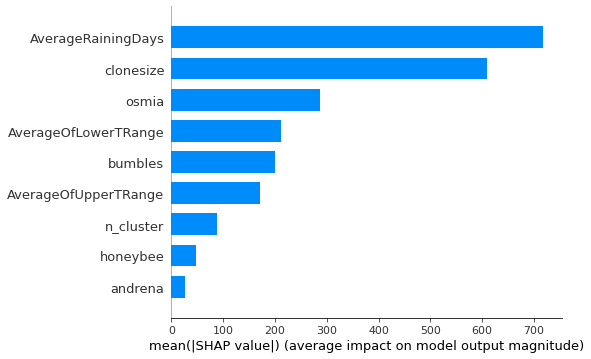

In [35]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

## Building ML models using sklearn pipeline object to improve RMSE score

In [45]:
# repeated kfold to 
cv = RepeatedKFold(n_splits= 5, n_repeats = 3, random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)

# define pipeline object
pipe_rf = Pipeline([
    ('sel', fs_info_v0), 
    ('model', RandomForestRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0), 
    ('model', XGBRegressor(random_state=1))
])


In [47]:
# prepare the parameters grid
grid_params_rf = [{'sel__k': [i for i in range(X_train.shape[1]-6, X_train.shape[1]-4)],
                   'model__max_depth': [15, 18, 10],
                   'model__min_samples_split': [15, 18, 10],
                   'model__n_estimators': [100,200,400,500]
                  }]

grid_params_xgb = [{'sel__k': [i for i in range(X_train.shape[1]-6, X_train.shape[1]-4)],
                    'model__max_depth': [9,12],
                    'model__min_child_weight': [7,8],
                    'model__subsample': [i/10. for i in range(9,11)]
                   }]

In [51]:
# set up the gridsearchCV objects
RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

# list of regression models
grids = [RF,XGB]

# Creating a dict for our reference
grid_dict = { 
        0: 'Random Forest',
        1: 'XGBoost'
    }

In [50]:
# Start form initial scaled model: X_train and X_test, y_train and y_test
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train, y_train)
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_test)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v0)))
        
        # Track best (least test error) model
        if mean_absolute_error(y_test, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    
    return (grid_dict[best_regr], best_gs, least_mae)

In [53]:
# run the pipeline and print the results
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Random Forest
Best Config: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200, 'sel__k': 5}
Best MAE: -350.572
Test set mean absolute error for best params: 377.378 
Test set root mean squared error for best params: 19.426 

Estimator: XGBoost
Best Config: {'model__max_depth': 9, 'model__min_child_weight': 8, 'model__subsample': 1.0, 'sel__k': 5}
Best MAE: -330.504
Test set mean absolute error for best params: 359.548 
Test set root mean squared error for best params: 18.962 

Classifier with least test set MAE: XGBoost
Best Model: XGBoost
Error Rate: 359.5480578300281
GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=50, random_state=1),
             estimator=Pipeline(steps=[('sel',
                                        SelectKBest(score_func=<function mutual_info_regression at 0x7f39c24a2200>)),
                                       ('model',
                                        XGBRegressor(base_

## Conclusions

- Final modeling pipeline shows XGBoost regressor with least RMSE score of `18` and MAE of `359`
- We have best parameters as well as best fitted model as well.